# World Data League 2022

## 🎯 Challenge
Avencas Marine Protected Area: Predict the future of the local ecosystem and its species


<img src="wdl_2023.png" alt="MoMoneyMoModels_Badge_whitebackground.png" style="width:35%">

## Team: Mo Money, Mo Models
## 👥 Authors
* David Raposo
* Duarte Pereira
* Martim Chaves
* Paulo Sousa


## 💻 Development
Start coding here! 🐱‍🏍

Create the necessary subsections (e.g. EDA, different experiments, etc..) and markdown cells to include descriptions of your work where you see fit. Comment your code. 

All new subsections must start with three hash characters. More specifically, don't forget to explore the following:
1. Assess the data quality
2. Make sure you have a good EDA where you enlist all the insights
3. Explain the process for feature engineering and cleaning
4. Discuss the model / technique(s) selection
5. Don't forget to explore model interpretability and fairness or justify why it is not needed

Pro-tip 1: Don't forget to make the jury's life easier. Remove any unnecessary prints before submitting the work. Hide any long output cells (from training a model for example). For each subsection, have a quick introduction (justifying what you are about to do) and conclusion (results you got from what you did). 

Pro-tip 2: Have many similiar graphs which all tell the same story? Add them to the appendix and show only a couple of examples, with the mention that all the others are in the appendix.

Pro-tip 3: Don't forget to have a motivate all of your choices, these can be: Data-driven, constraints-driven, literature-driven or a combination of any. For example, why did you choose to test certain algorithms or why only one.

### Introduction

#### The place

Avencas, near Lisbon, Portugal, was classified as a Biophysical Interest Zone (ZIBA) in 1998 due to its **high intertidal biodiversity**.

This classification **sparked controversy and conflict with locals**, leading to **non-compliance** with regulations. In 2016, after concerted efforts from local authorities, Avencas was reclassified as a Marine Protected Area (MPA). Marine Protected Areas (MPAs) constitute coastal management tools that aim to mitigate threats to the functioning of the areas and can be planned according to diﬀerent speciﬁc objectives.

Along with the reclassification, **public participation sessions and environmental awareness** activities were carried out, **improving regulation compliance**, particularly within the **fishing community**.

Certain activities, including aquaculture, water motor sports, fishing, and collection of animals, are prohibited unless authorized for scientific studies. (From Ferreira et al. 2017)

#### A Success Story

"[...] user management actions have been created including visitors’ pathways through the rocky platforms and information spots displaying signs with area specific rules at the entrance to the beach. Positive results point to the success of this approach, as visitors either agreed or respected the various management actions implemented. A survey showed that 84% of visitors look favorable upon the information spots and 76% agree with the location of the access pathways. " (Challenge Brief)

#### A Problem Arises...

But... "The local usages are now under control, [...] allowing for a decrease in the anthropogenic stress of this small MPA, so in theory the intertidal ecosystem should be recovering at a faster rate than what is being recorded by our teams of biologists." In other words: locals are now not adding stress to the MPA. But, it's still not recovering as fast as we expected. So, some other factors are probably at play here, likely related to the global changes to the climate that we are witnessing.

#### The Solution

Knowing this, a great tool to further improve the biodiversity, and assure the health and sustainability of the Avencas MPA, would be an **interactive app** that could visually represent the sessile species coverage in the MPA, and informs the locals and the general populace of how important sessile species are for the Avencas MPA.

This could be in the form of an **interactive, sea-side screen**, and an **online web app**.

The **goal** of this app would be to, **beyond the specific Avencas MPA**, captivate people, locals and non-locals, to how important marine life can be, and to incentivize them to become **champions of environmentally friendly causes**, so that they may pressure policy makers, and contribute towards meaningful, large scale, change.

Sessile species highly contribute towards MPAs, in several ways. Here's some that could be emphasized:

* Biodiversity: Our ocean is amazing - it's a home for all sorts of sessile organims like algae, coral, and even sea slugs! All of these different being create complex neighboorhoods that host a wild variety of life. Some call corals "rainforests of the sea", as they're teeming with fascinating biodiversity!

* Food Source: Each being plays a part in these complex neighboorhouds down under the sea. Some are treats for other larger beings, like algae, mussels, and barnacles, while other act as an amazing clean-up crew, like the amazing fungi. Each being is important, as each is a key element to the assurance of the marina areas, keeping the ocean clean and healthy!

* Carbon Sequestration: Also, another major role that algae and coral play is when it come to sucking up carbon dioxide and giving oxygen in return, aiding us in fighting climate change. Besides being pretty, they're also working hard to keep our planet cooool.

("Marine Biology: An Ecological Approach" by Nybakken and Bertness, "Dynamics of Marine Ecosystems: Biological-Physical Interactions in the Oceans" by Mann and Lazier)

But first... let's look at the data that we have at hand!

### EDA

Examining the structure, contents, and basic statistics of the dataset. 

In [14]:
# Relevant Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [13]:
# set Seaborn style and context
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook')

#### Initial Feel

In [3]:
data_path = os.path.join("data", "raw", "files_WDL", "cascais_data", "AMPA_Data_Sample.xlsx")

with pd.ExcelFile(data_path) as xls:
    sheet_names = xls.sheet_names          

print(sheet_names) 

['Sessil (% Coverage)', ' Mobil (nº individuals)', 'Invasive_conservat species list']


Our main dataset has 3 sheets.

Opening each sheet, visually, we can understand that:
1. 'Sessil (% Coverage)' focuses on sessile species, i.e. species that fixate on a substracte. It contains measures of percentage of coverage for each specie being analysed for a random "quadrat" in one of five sectors of the MPA. These measures seem to be taken sporadically, around a couple of times per month, over the span of many years, from 2011 to 2020.
2. ' Mobil (nº individuals)' is similar to the previous sheet, but contains only mobile species.
3. 'Invasive_conservat species list' dictates which species are invasive, and which are under risk of extinction.

#### Reading the Data

In [117]:
sessil_df = pd.read_excel(data_path, sheet_name=sheet_names[0])
mobile_df = pd.read_excel(data_path, sheet_name=sheet_names[1])
invsve_df = pd.read_excel(data_path, sheet_name=sheet_names[2])

Visually, it has been understood that there are some columns that are not relevant to us, and that can be dropped.
They are information about who took the sample, and two extra columns that contain no information. So, let's get rid of them! :)

In [118]:
columns_to_drop_sessil = ['Sampler', 'Coluna1', 'Coluna2']
columns_to_drop_mobile = ['Sampler', 'Column1', 'Column2', 'Column3']

sessil_df = sessil_df.drop(columns_to_drop_sessil, axis=1)
mobile_df = mobile_df.drop(columns_to_drop_mobile, axis=1)

Let's get a general idea of what we're dealing with...

In [6]:
def initial_data_profiling(data: pd.DataFrame):
    # Get the data types of each column
    data_types = data.dtypes

    # Get the summary statistics of the DataFrame
    summary_stats = data.describe()

    # Get the number of missing values in each column
    missing_values = data.isnull().sum()

    # Get the unique values in each column
    unique_values = data.nunique()

    # Display the data profiling information
    print("Data Types:")
    print(data_types)
    print("\nSummary Statistics:")
    print(summary_stats)
    print("\nMissing Values:")
    print(missing_values)
    print("\nUnique Values:")
    print(unique_values)

In [19]:
print("Sessile")
initial_data_profiling(sessil_df)

Sessile
Data Types:
Date                                        datetime64[ns]
Hour                                                object
Tide                                               float64
Weather Condition                                   object
Water temperature (ºC)                              object
                                                 ...      
Sphacelaria rigidula (pompons castanhos)           float64
Cystoseira sp.                                      object
Laminaria sp.                                      float64
TOTAL2                                              object
observações                                         object
Length: 102, dtype: object

Summary Statistics:
              Tide  Siphonaria algesirae  Gibbula sp.  Monodonta lineata  \
count  2010.000000           2010.000000  2010.000000        2010.000000   
mean      0.729035              0.237736     0.290647           0.128532   
std       0.184047              0.914012     0.882766  

#### Separation of Meta Info and Samples' values

In [78]:
print(f"Number of columns (sessile): {len(sessil_df.columns)}")
print(f"Number of columns (mobil): {len(mobile_df.columns)}")
print(f"Number of columns (invasice): {len(invsve_df.columns)}")

Number of columns (sessile): 102
Number of columns (mobil): 67
Number of columns (invasice): 10


This isn't particularly useful... What's happening is that there are a lot of different species. So it's a bit difficult to accurately get an idea of the data using simple describe methods. We're dealing with 102 columns for the sessile df, and 67 columns for the mobil one.

To deal with this, let's separate the dataframes into information about the samples, and the information about the species in the samples themselves.

This way, we'll be able to get an idea regarding the meta-information of the samples (how often were they taken, what were the hours of the day when they were taken, and so on), and an idea regarding the information of the species themselves (although a general idea, not a specie by specie level idea).

We'll leave the ivasive lists analysis for last.

In [119]:
# List of columns that represent sample information (excluding species columns)
sessil_meta_info_columns = ['Date', 'Hour', 'Tide', 'Weather Condition',
                            'Water temperature (ºC)', 'Zone',
                            'Supratidal/Middle Intertidal', 'Substrate',
                            'TOTAL2', 'observações']

mobile_meta_info_columns = ['Date', 'Hour', 'Tide', 'Weather Condition',
                            'Water temperature (ºC)', 'Zone',
                            'Supratidal/Middle Intertidal', 'Substrate',
                            'TOTAL', 'Abundance (ind/m2)']

In [120]:
# Create the meta_info_df DataFrame with sample information
sessil_meta_info_df = sessil_df[sessil_meta_info_columns]
mobile_meta_info_df = mobile_df[mobile_meta_info_columns]

# Create the species_info_df DataFrame with species information
sessil_species_info_df = sessil_df.drop(columns=sessil_meta_info_columns)
mobile_species_info_df = mobile_df.drop(columns=mobile_meta_info_columns)

# Delete original df to free up memory
del sessil_df
del mobile_df

#### Analysis of Meta Info's Columns' data types

In [10]:
print("Analysis of Sessil samples' meta info")
initial_data_profiling(sessil_meta_info_df)

Analysis of Sessil samples' meta info
Data Types:
Date                            datetime64[ns]
Hour                                    object
Tide                                   float64
Weather Condition                       object
Water temperature (ºC)                  object
Zone                                    object
Supratidal/Middle Intertidal            object
Substrate                               object
TOTAL2                                  object
observações                             object
dtype: object

Summary Statistics:
              Tide
count  2010.000000
mean      0.729035
std       0.184047
min       0.300000
25%       0.600000
50%       0.700000
75%       0.900000
max       2.400000

Missing Values:
Date                               1
Hour                               1
Tide                               1
Weather Condition                  1
Water temperature (ºC)             9
Zone                               1
Supratidal/Middle Intertidal       

Some things to note:
- Date and hour could be combined to have on single datatime object
- Water temperature and TOTAL2 should be a float (TOTAL2 is the sum of the % coverages)
- The distribution for the values of the Tide seems OK. In the Q&A, a subject matter expert mentioned that the large majority of the times the tide value should be around 0.8, which is the case. There are some cases where the value is considerably higher than that (2.4 maximum value), but that value seems reasonable, a statistical outlier, but not necessarily an anomaly

Knowing this, let's change those types, and plot some charts to get a better, visual idea of how things are.

In [121]:
# Convert object to numeric when needed
sessil_meta_info_df['Water temperature (ºC)'] = pd.to_numeric(\
    sessil_meta_info_df['Water temperature (ºC)'], errors='coerce')

sessil_meta_info_df['TOTAL2'] = pd.to_numeric(\
    sessil_meta_info_df['TOTAL2'], errors='coerce')

#### Distribution of the Meta Info columns' values

How often are samples taken? Let's plot the number of samples per month taken to get an idea!

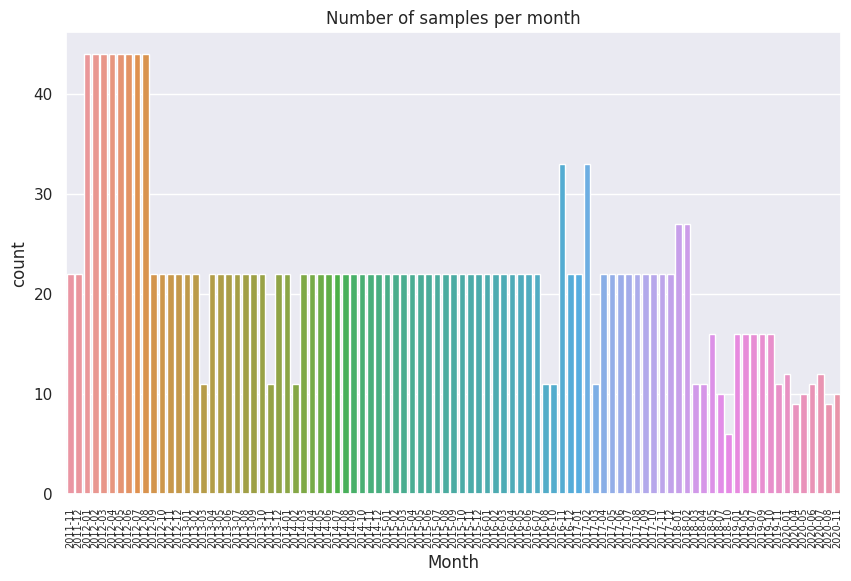

In [37]:
sessil_meta_info_df['Month'] = sessil_meta_info_df['Date'].dt.to_period('M') # Extracting month from Date

plt.figure(figsize=(10,6))
sns.countplot(data=sessil_meta_info_df, x='Month')
plt.title('Number of samples per month')
plt.xticks(rotation=90, fontsize=7)
plt.show()

Except for the spikes aroud the year of 2012, it seems that the amount of samples being taken remains reasonably stable, so we shouldn't worry too much about the quality of the frequency of the data. Now, let's get an idea of the general distribution of the values.

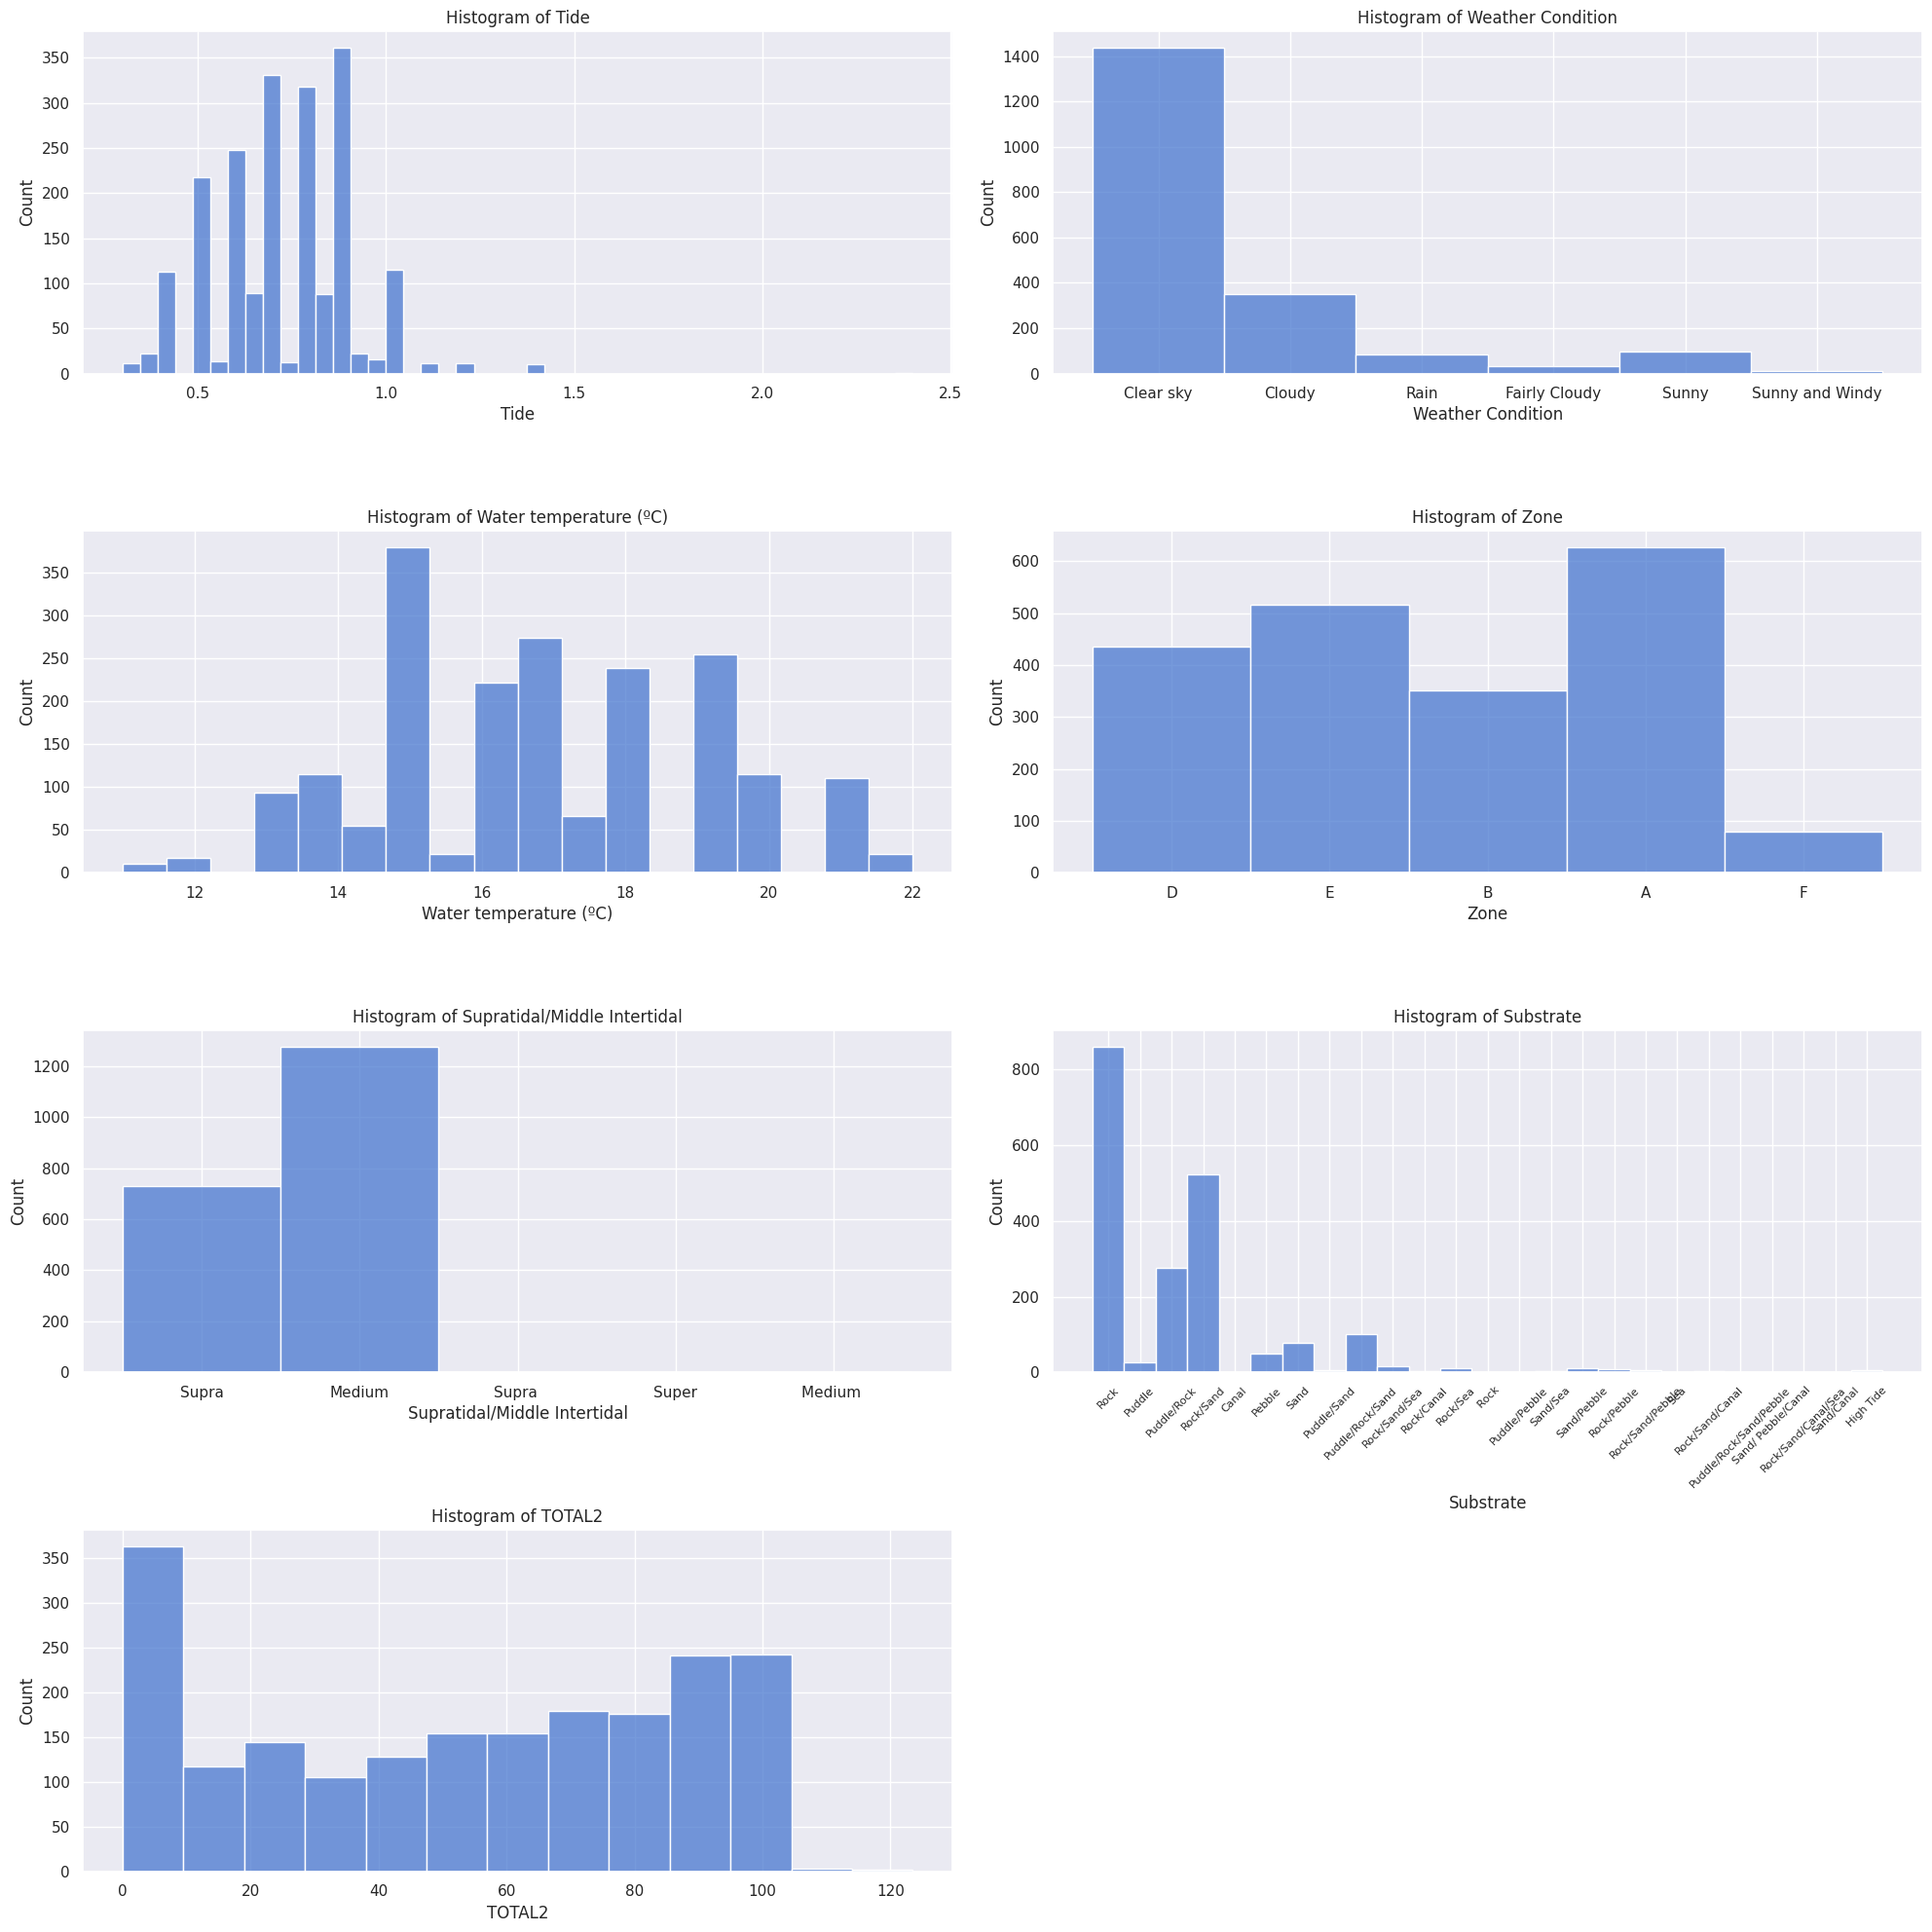

In [25]:
columns = ['Tide', 'Weather Condition', 'Water temperature (ºC)', 'Zone', 'Supratidal/Middle Intertidal', 'Substrate', 'TOTAL2']

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(4, 2)

for i, column in enumerate(columns):
    ax = plt.subplot(gs[i])
    sns.histplot(data=sessil_meta_info_df, x=column, ax=ax)
    ax.set_title('Histogram of ' + column)
    if column == 'Substrate':
        plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()

plt.show()

Quite a few things to note:
- Again, the tide values seem to be OK.
- It may be useful to group some of the weather conditions and some of the substrates.
    - It seems that it may make sense to create groups.
    - For example good and bad weather for the weather condition, and Rock, Puddle, and Sand for the substrate
    - The general idea remains, and we reduce the complexity that these features may possess.
    - In this case, it would be complexity that would be difficult to deal with. With each added degree of freedom, there aren't many samples to contribute towards them, so the feature space becomes very sparse. This makes it harder for any model to learn (the curse of dimensionality).
- Zone F has considerably fewer samples than other zones.
- Some rows have a slight variantion when it comes to the Supratidal/Middle Intertidal inputs that needs to be fixed.
- Sometimes the percentage of coverage is higher than 100%, and that's OK - from the Q&A, it means that some species overlapped.

Let's fix the Supra/Middle issue and carry out the groupings.

#### Fixing Speeling issues with Supra/Middle Intertidal column

In [82]:
values_and_counts_supra_middle = sessil_meta_info_df['Supratidal/Middle Intertidal'].value_counts()
print(values_and_counts_supra_middle)

Medium     1276
Supra       730
Supra         2
Super         1
Medium        1
Name: Supratidal/Middle Intertidal, dtype: int64


In [38]:
values_and_counts_supra_middle.index[0]

'Medium'

In [39]:
values_and_counts_supra_middle.index[1]

'Supra'

In [40]:
values_and_counts_supra_middle.index[2]

'Supra '

The most commonly written forms are spelled without any extra spacing.

In [105]:
replacements = {values_and_counts_supra_middle.index[2]: values_and_counts_supra_middle.index[1], # supra
                values_and_counts_supra_middle.index[3]: values_and_counts_supra_middle.index[1], # supra
                values_and_counts_supra_middle.index[4]: values_and_counts_supra_middle.index[0]} # medium
sessil_meta_info_df['Supratidal/Middle Intertidal'] = sessil_meta_info_df['Supratidal/Middle Intertidal']\
    .replace(replacements)

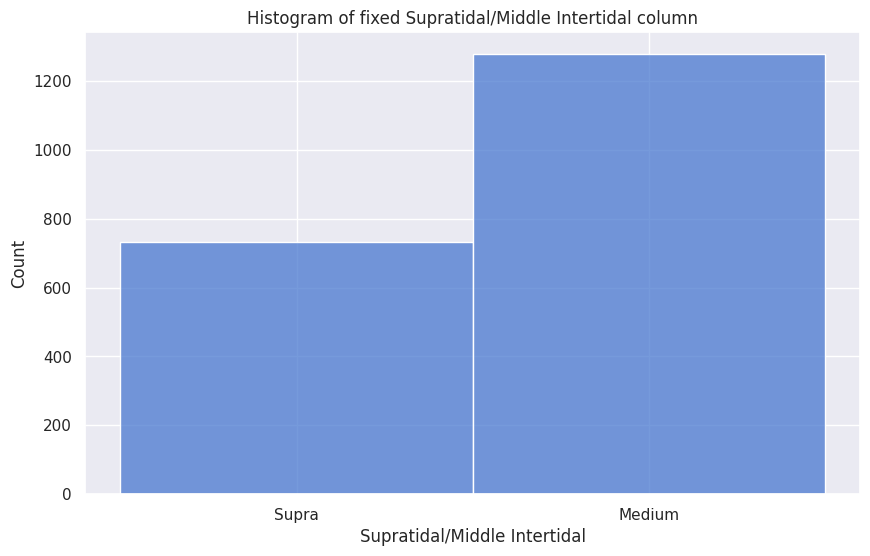

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(data=sessil_meta_info_df, x='Supratidal/Middle Intertidal')
plt.title('Histogram of fixed Supratidal/Middle Intertidal column')
plt.show()

Perfect! 👌

#### Grouping Weather Conditions and Substrate

##### Weather Condition

In [106]:
sessil_meta_info_df['Weather Condition'].value_counts()

Clear sky          1437
Cloudy              351
Sunny                97
Rain                 83
Fairly Cloudy        33
Sunny and Windy       9
Name: Weather Condition, dtype: int64

In [123]:
def weather_group(weather):
    if pd.isna(weather):  # Handle NaN or None values
        return 'Unknown'
    elif 'Clear sky' in weather:
        return 'Good'
    elif 'Sunny' in weather:
        return 'Good'
    elif 'Sunny and Windy' in weather:
        return 'Good'
    else:
        return 'Bad'

In [124]:
sessil_meta_info_df['Weather Condition'] = sessil_meta_info_df['Weather Condition'].apply(weather_group)

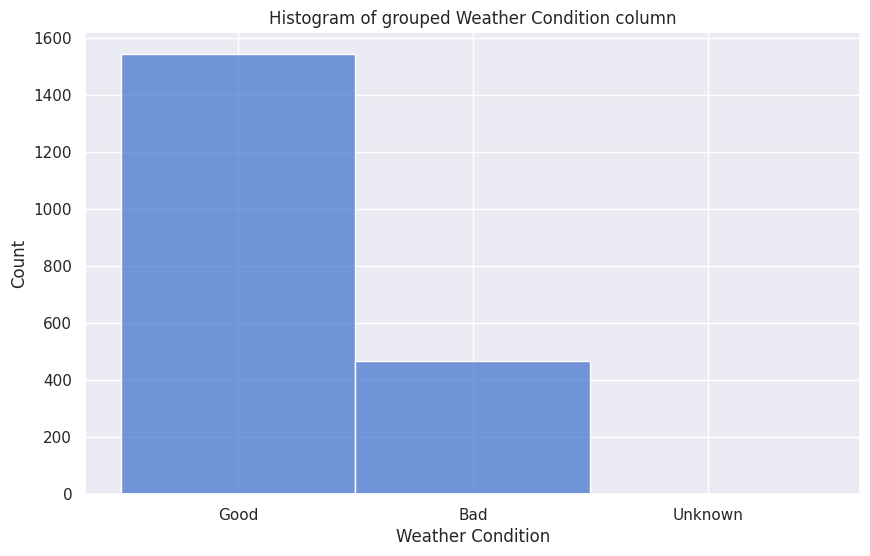

In [125]:
plt.figure(figsize=(10,6))
sns.histplot(data=sessil_meta_info_df, x='Weather Condition')
plt.title('Histogram of grouped Weather Condition column')
plt.show()

In [126]:
sessil_meta_info_df['Weather Condition'].value_counts()

Good       1543
Bad         467
Unknown       1
Name: Weather Condition, dtype: int64

There seems to be one missing value. Will be dealt with later. For now, it's as intended (although there's quite a large difference, unfortunately).

##### Substrate

In [127]:
sessil_meta_info_df['Substrate'].value_counts()

Rock                       860
Rock/Sand                  523
Puddle/Rock                275
Puddle/Rock/Sand           101
Sand                        78
Pebble                      49
Puddle                      26
Rock/Sand/Sea               17
Sand/Pebble                 12
Rock/Sea                    11
Rock/Pebble                  8
High Tide                    7
Puddle/Sand                  7
Rock/Sand/Pebble             5
Rock/Canal                   4
Sand/Sea                     4
Rock/Sand/Canal              4
 Rock                        2
Puddle/Pebble                1
Canal                        1
Sea                          1
Puddle/Rock/Sand/Pebble      1
Sand/ Pebble/Canal           1
Rock/Sand/Canal/Sea          1
Sand/Canal                   1
Name: Substrate, dtype: int64

In [112]:
substrate_key_words = sessil_meta_info_df['Substrate'].value_counts().index

In [113]:
substrates_list = []
for key_words in substrate_key_words:
    key_word_lst = key_words.split('/')
    for key_substrate in key_word_lst:
        if len(key_substrate) > 1:
            substrates_list.append(key_substrate)
print(f"Relevant substrates: \n {pd.unique(substrates_list)}")

Relevant substrates: 
 ['Rock' 'Sand' 'Puddle' 'Pebble' 'Sea' 'High Tide' 'Canal' ' Rock'
 ' Pebble']


In [166]:
import random
def substrate_group(substrate):
    """
    For each word in substrate, add that word to a list.
    At the end, return a random word from that list.
    """
    substrate_list = []
    if pd.isna(substrate):  # Handle NaN or None values
        return 'Unknown'
    if 'Rock' in substrate:
        substrate_list.append('Rock')
    if 'Sand' in substrate:
        substrate_list.append('Sand')
    if 'Puddle' in substrate:
        substrate_list.append('Puddle')
    if 'Pebble' in substrate:
        # Let's consider Pebble a type of Rock as they are essentially many rocks together
        # Not ideal, but hopefully reasonable
        substrate_list.append('Rock')
    
    if len(substrate_list) == 0:
        substrate_list.append('Other')

    # If this is not done
    # There's a very large bias towards 'Rock'
    while len(substrate_list) > 1 and 'Rock' in substrate_list:
        substrate_list.remove('Rock')

    return random.choice(substrate_list)

In [167]:
sessil_meta_info_df['Substrate'] = sessil_meta_info_df['Substrate'].apply(substrate_group)

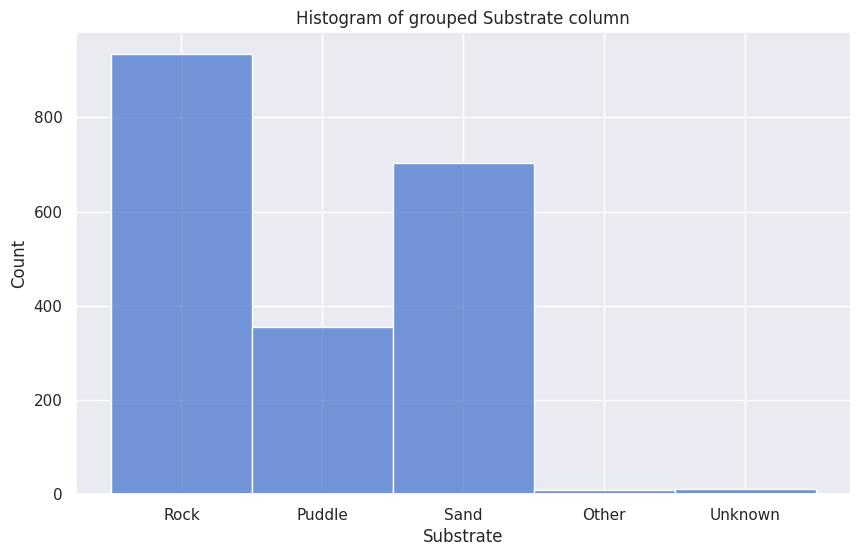

In [168]:
plt.figure(figsize=(10,6))
sns.histplot(data=sessil_meta_info_df, x='Substrate')
plt.title('Histogram of grouped Substrate column')
plt.show()

Not exactly perfect, but better! We'll potentially drop the 'Other' (seems like a very niche case), and imputate the 'Unknowns'.

#### Sneaky Zone F

Let's also get an idea of how many samples are taken each month (on average) for each different Zone/Sector.

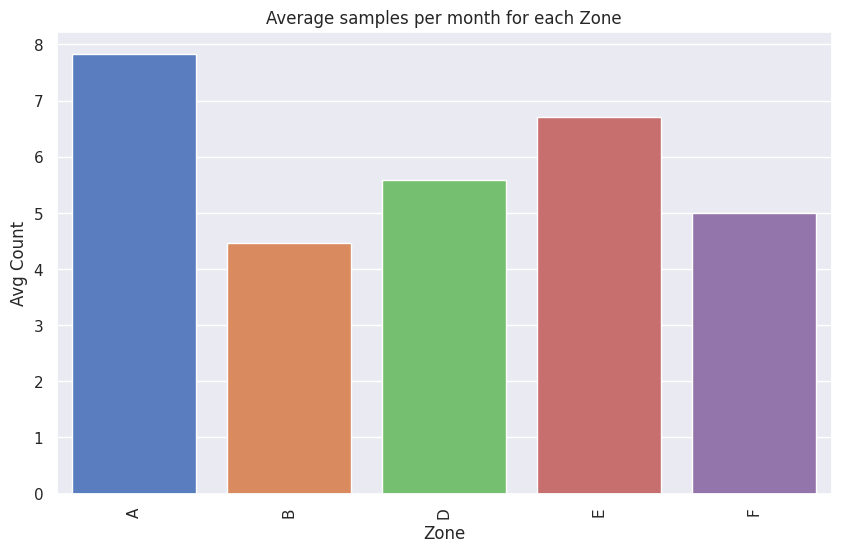

In [27]:
# Group by both 'Zone' and 'Month' and calculate average
monthly_samples = sessil_meta_info_df.groupby(['Zone', 'Month']).size()\
    .groupby(['Zone']).mean().reset_index(name='Avg Count')

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_samples, x='Zone', y='Avg Count')
plt.title('Average samples per month for each Zone')
plt.xticks(rotation=90)
plt.show()

This is interesting and a bit unexpected. This would make sense if the samples from Zone F only started being taken after some time had passed. And when they started being taken, the frequency was similar to the other Zones. Let's check that with the earliest date for Zone F.

In [46]:
earliest = sessil_meta_info_df[sessil_meta_info_df['Zone'] == 'F']['Date'].min()
latest = sessil_meta_info_df[sessil_meta_info_df['Zone'] == 'F']['Date'].max()
print(f"Earliest record of a sample from Zone F: {earliest}")
print(f"Latest record of a sample from Zone F: {latest}")

Earliest record of a sample from Zone F: 2018-01-18 00:00:00
Latest record of a sample from Zone F: 2020-11-16 00:00:00


As expected, samples from Zone F only started being taken after 2018 (even though samples were being taken as early as 2011). Considering this, ideally we would train two models. One without Zone F, from the data starting from 2011. And another with all of the Zones' different data, starting from 2018. For now, we'll only do the first version, as it should be the easiest one, i.e. having the most amount of data, and the least complexity.

#### Analysing Observations

Let's look at the top observations available.

In [22]:
top_observations = sessil_meta_info_df['observações'].value_counts().nlargest(6)
print(f"Top 6 most common observations: \n{top_observations}")

Top 6 most common observations: 
0                           353
muita areia                  15
postura de areia             12
tubos de Sabellaria          10
Mini caracol negro: 0,1       5
zona de cimento (trilho)      5
Name: observações, dtype: int64


One of the observations is just "0", probably a filler value that we can ignore.

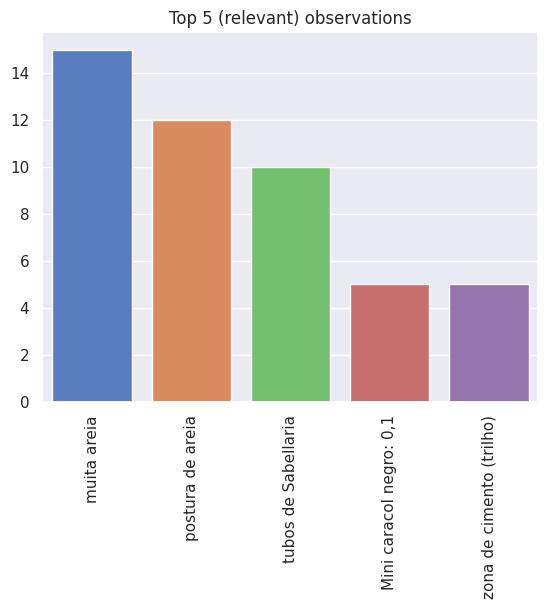

In [23]:
# Plot histogram of top 3 observations
sns.barplot(x=top_observations[1::].index, y=top_observations[1::].values)
plt.title('Top 5 (relevant) observations')
plt.xticks(rotation=90)
plt.show()

It's rare that there are relevant observations available (considering that there around 2000 rows), and, it's not exactly clear how these observations influence the rest of the data. Considering that, a safe and easy to implement option to deal with this data is to remove the observations column.

In [171]:
sessil_meta_info_df.drop(['observações'], axis=1, inplace=True)

In [173]:
sessil_meta_info_df.columns

Index(['Date', 'Hour', 'Tide', 'Weather Condition', 'Water temperature (ºC)',
       'Zone', 'Supratidal/Middle Intertidal', 'Substrate', 'TOTAL2'],
      dtype='object')

#### Conclusions on the analysis of the values of the meta information

- Changed the data type of 'Weather Temperature (ºC)' and 'TOTAL2'
- Fixing Speeling issues with Supra/Middle Intertidal column
- Grouped Weather Condtions and Substrate
- Reasoned about whether or not to keep samples from Zone F
- Removed (with justification) the observations column

#### Analysis of the distribution of values of the species % coverage

Let's start by looking at how often the values are zero, and, when they're not zero, what are their usual distribution.

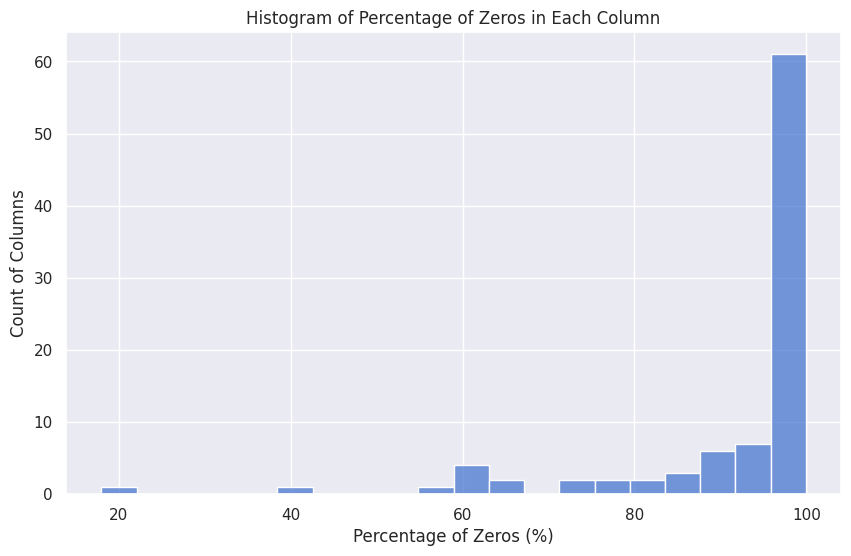

In [182]:
# Calculate the percentage of zeros for each column and save it to a list
percentage_zeros = [(sessil_species_info_df[col] == 0).mean() * 100 for col in sessil_species_info_df.columns]

# Plot a histogram of the percentage of zeros
plt.figure(figsize=(10,6))
sns.histplot(percentage_zeros, bins=20, kde=False)
plt.title('Histogram of Percentage of Zeros in Each Column')
plt.xlabel('Percentage of Zeros (%)')
plt.ylabel('Count of Columns')
plt.show()

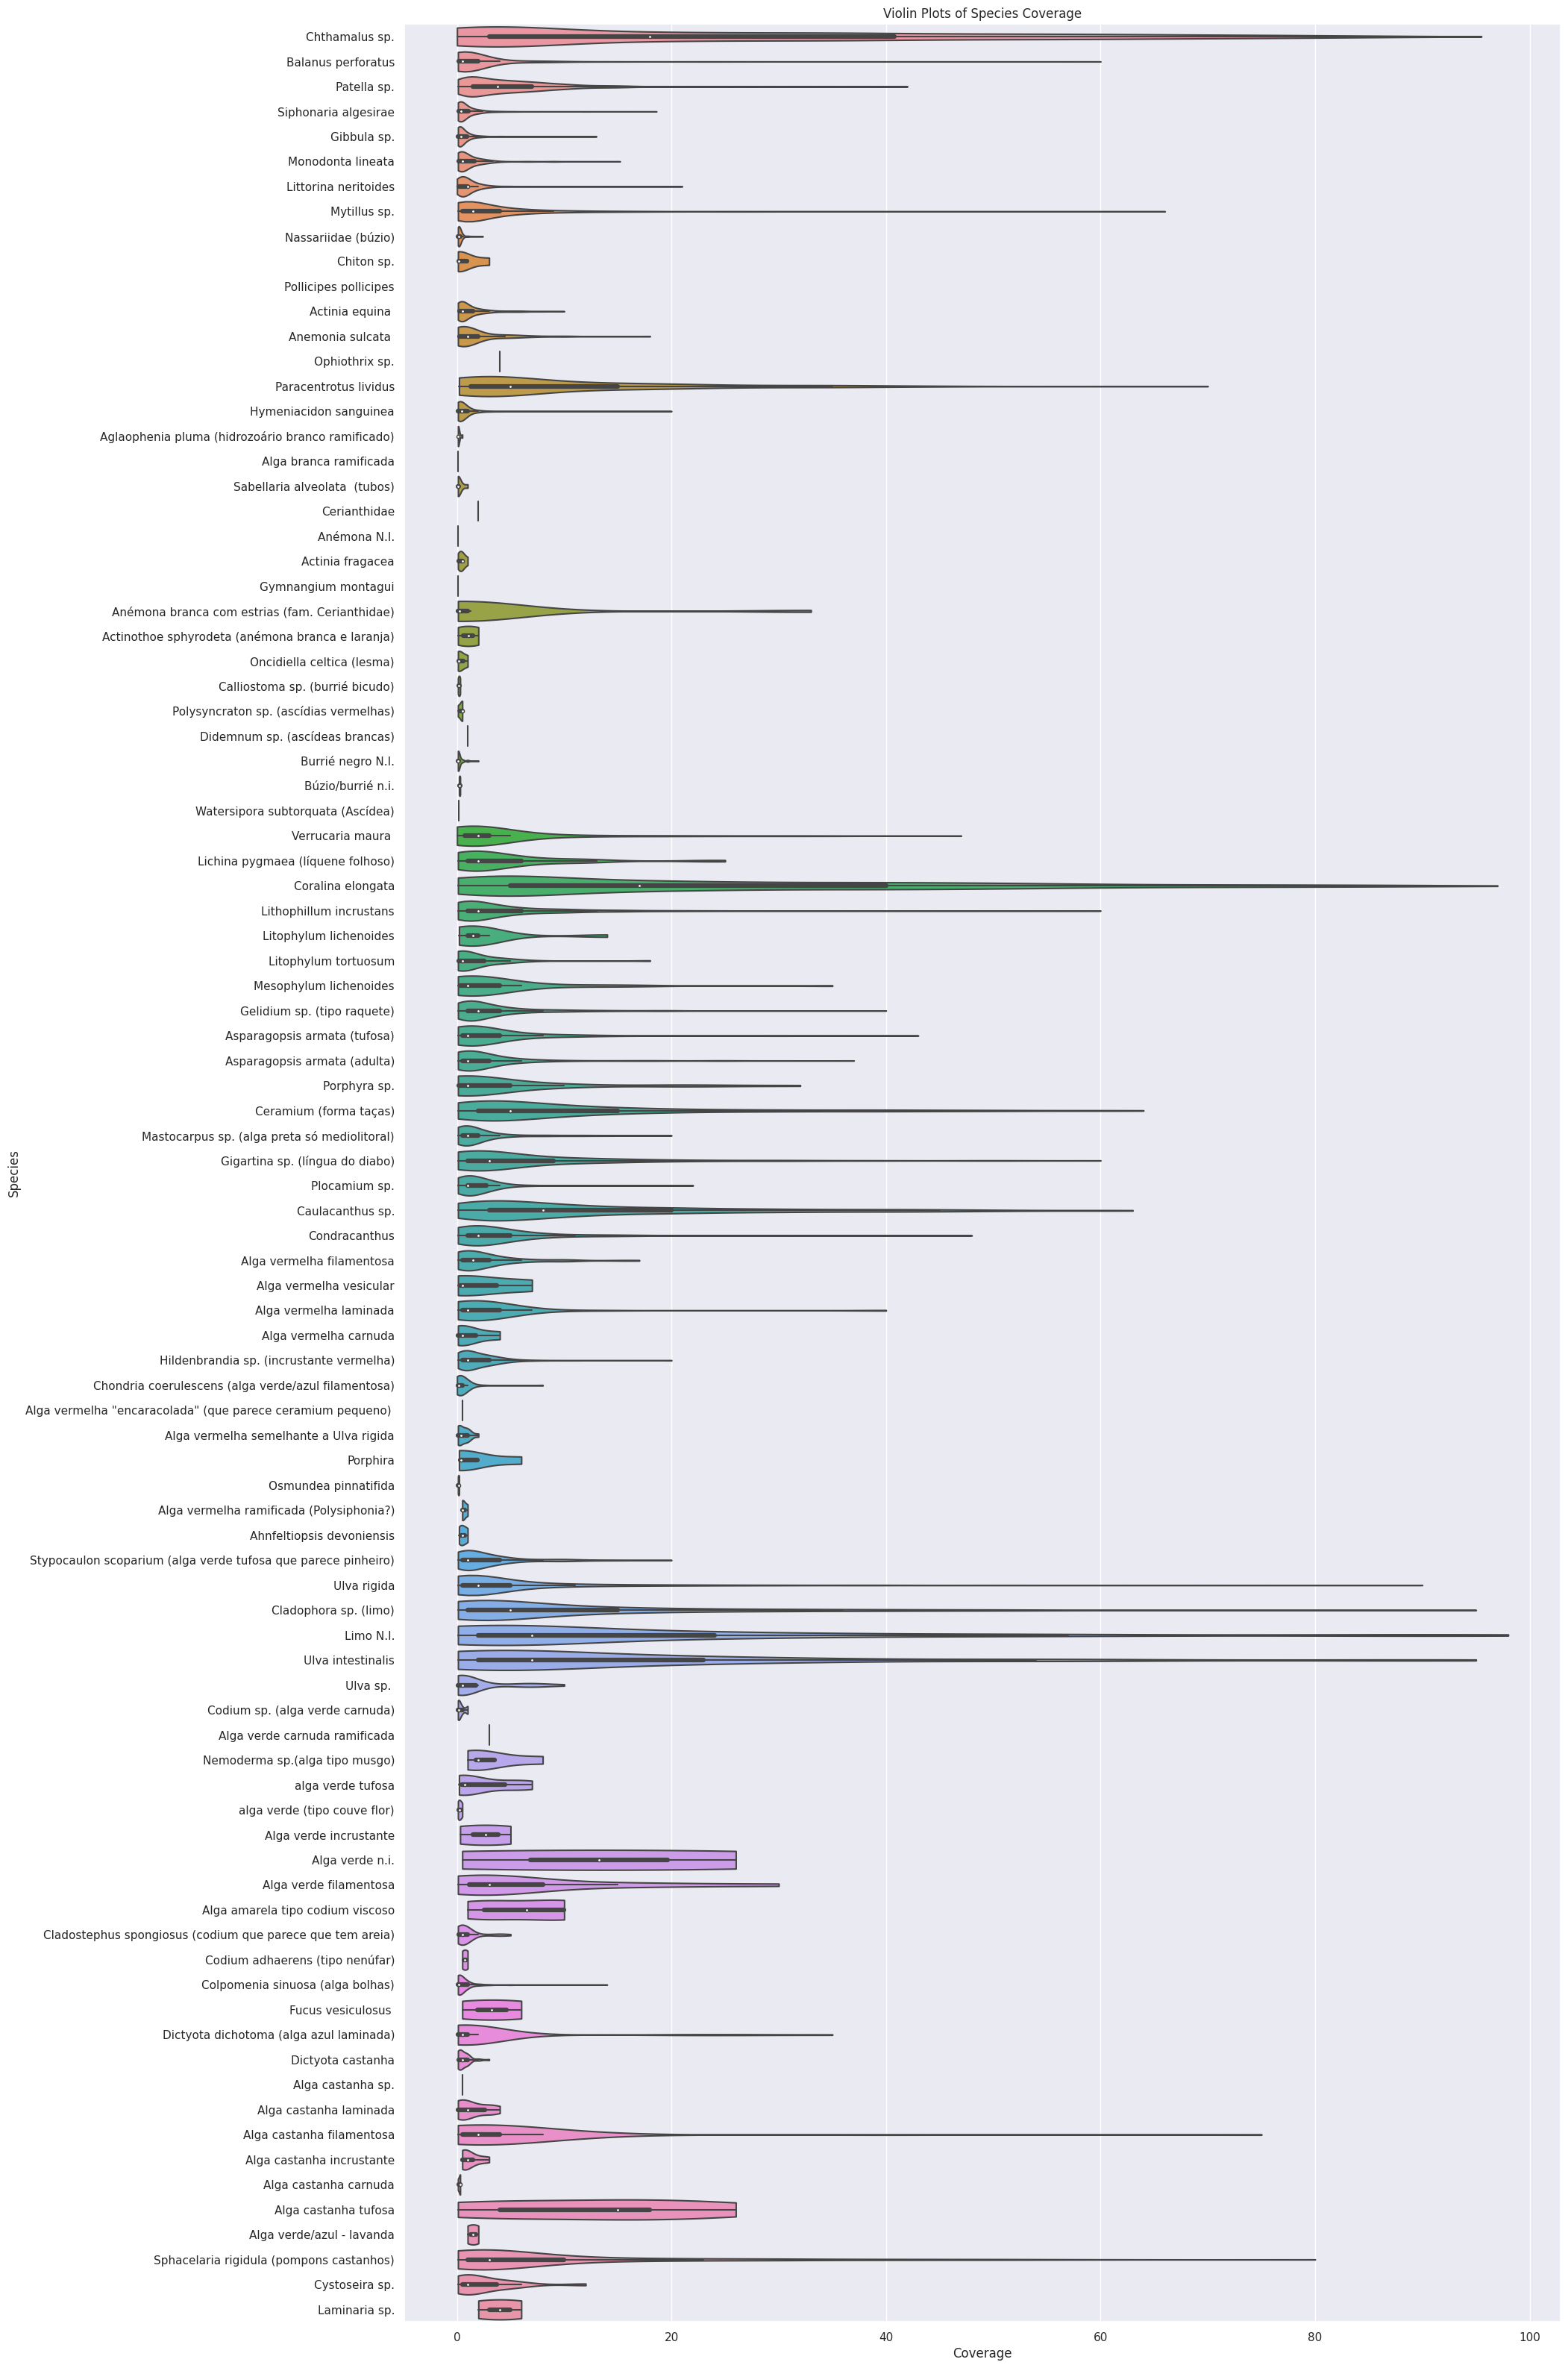

In [187]:
# Reshape to long format. Assuming df is your dataframe.
df_melted = sessil_species_info_df.melt(var_name='Species', value_name='Coverage')

# Convert the 'Coverage' column to a numeric data type
df_melted['Coverage'] = pd.to_numeric(df_melted['Coverage'], errors='coerce')

# Remove zero values
df_melted = df_melted[df_melted['Coverage'] != 0]

# Increase the size of the plot
plt.figure(figsize=(20, 40))

# Create violin plot
sns.violinplot(data=df_melted, y='Species', x='Coverage', scale='width', cut=0)

# Show the plot
plt.title('Violin Plots of Species Coverage')
plt.show()

- Often, the value for coverage for most species is 0. I.e., often most of the species are not found.
- Interestingly, but unfortunately for us, often we're dealing with very long tails. These are usually harder to model.
- Note that sometimes, it's very rare (happening sometimes once even) for a certain specie to have any coverage (we can see this in the violin plots where there's no clear distribution, only a dash).
- All of the medians are below 20%, often below 10%. So most of the times, if there is any specie in a quadrat, it's only covering part of the quadrat.
- In some rare occasions, some species occupied most of the quadrat.

After manually going through all of the sessil species, it was found that there were no repeated ones. However, it seemed like often a specie had referece to another specie, such as "similar to X" or "like Y".

Plus, very often, as shown by above, columns are often mostly zeroes. If we were to try to model this, it would likely be quite hard, as we would **probably** be dealing with very random patterns for the large majority of the classes. I.e., a specie would often be zero, and then have a sporadic jump. Predicting this sporadic jump would **probably** be quite difficult, since we're dealing with a random quadrat in a certain Zone. Furthermore, we're dealing with distributions that have quite long tails. We ought to reduce the complexity of this a bit, to ensure that modeling may work reasonably well. 

Nevertheless, let's add back some columns with some meta information, and calculate some correlations, to see if there are any underlying relationships that a model could learn.

#### Putting everything back together, and taking care of Missing Values

At this point, it's best to put everything back together, and to take care of the missing values, and remove some specific rows, like Zone 'F', and 'Other'/'Unknown' Substrate, and 'Unknown' Weather Condition.

Since we haven't removed any rows, we can do the join by the index. But first, we have to make sure that every value of the species % coverage is a float.

In [224]:
sessil_species_info_df.dtypes

Chthamalus sp.                               object
Balanus perforatus                           object
Patella sp.                                  object
Siphonaria algesirae                        float64
Gibbula sp.                                 float64
                                             ...   
Alga castanha tufosa                        float64
Alga verde/azul - lavanda                   float64
Sphacelaria rigidula (pompons castanhos)    float64
Cystoseira sp.                               object
Laminaria sp.                               float64
Length: 92, dtype: object

We can't just make every column of the data type float, since there are some missing values...

Interestingly, one specific column had a very large amount of missing values. Since we're dealing with over 80% missing values (1640/2010), we'll just drop that particular specie.

In [235]:
# Calculate the number of missing values in each column
missing_values = sessil_species_info_df.isnull().sum()

# Convert Series to DataFrame for seaborn
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

In [248]:
missing_values_df[missing_values_df['Missing Values'] == missing_values_df['Missing Values'].max()]

,Column,Missing Values
31,Watersipora subtorquata (Ascídea),1649


In [249]:
# Drop really large missing values column
sessil_species_info_df = sessil_species_info_df.drop('Watersipora subtorquata (Ascídea)', axis=1)

Everysingle column has missing values for the last row. So, let's get rid of that one. Then we'll tackle the "real" missing values.

In [251]:
sessil_species_info_df = sessil_species_info_df.iloc[:-1]
sessil_meta_info_df = sessil_meta_info_df.iloc[:-1]

For now, let's change the data type.

In [271]:
sessil_species_info_df = sessil_species_info_df.apply(pd.to_numeric, errors='coerce')

Now that everything is numeric, let's get an accurate idea of the missing values.

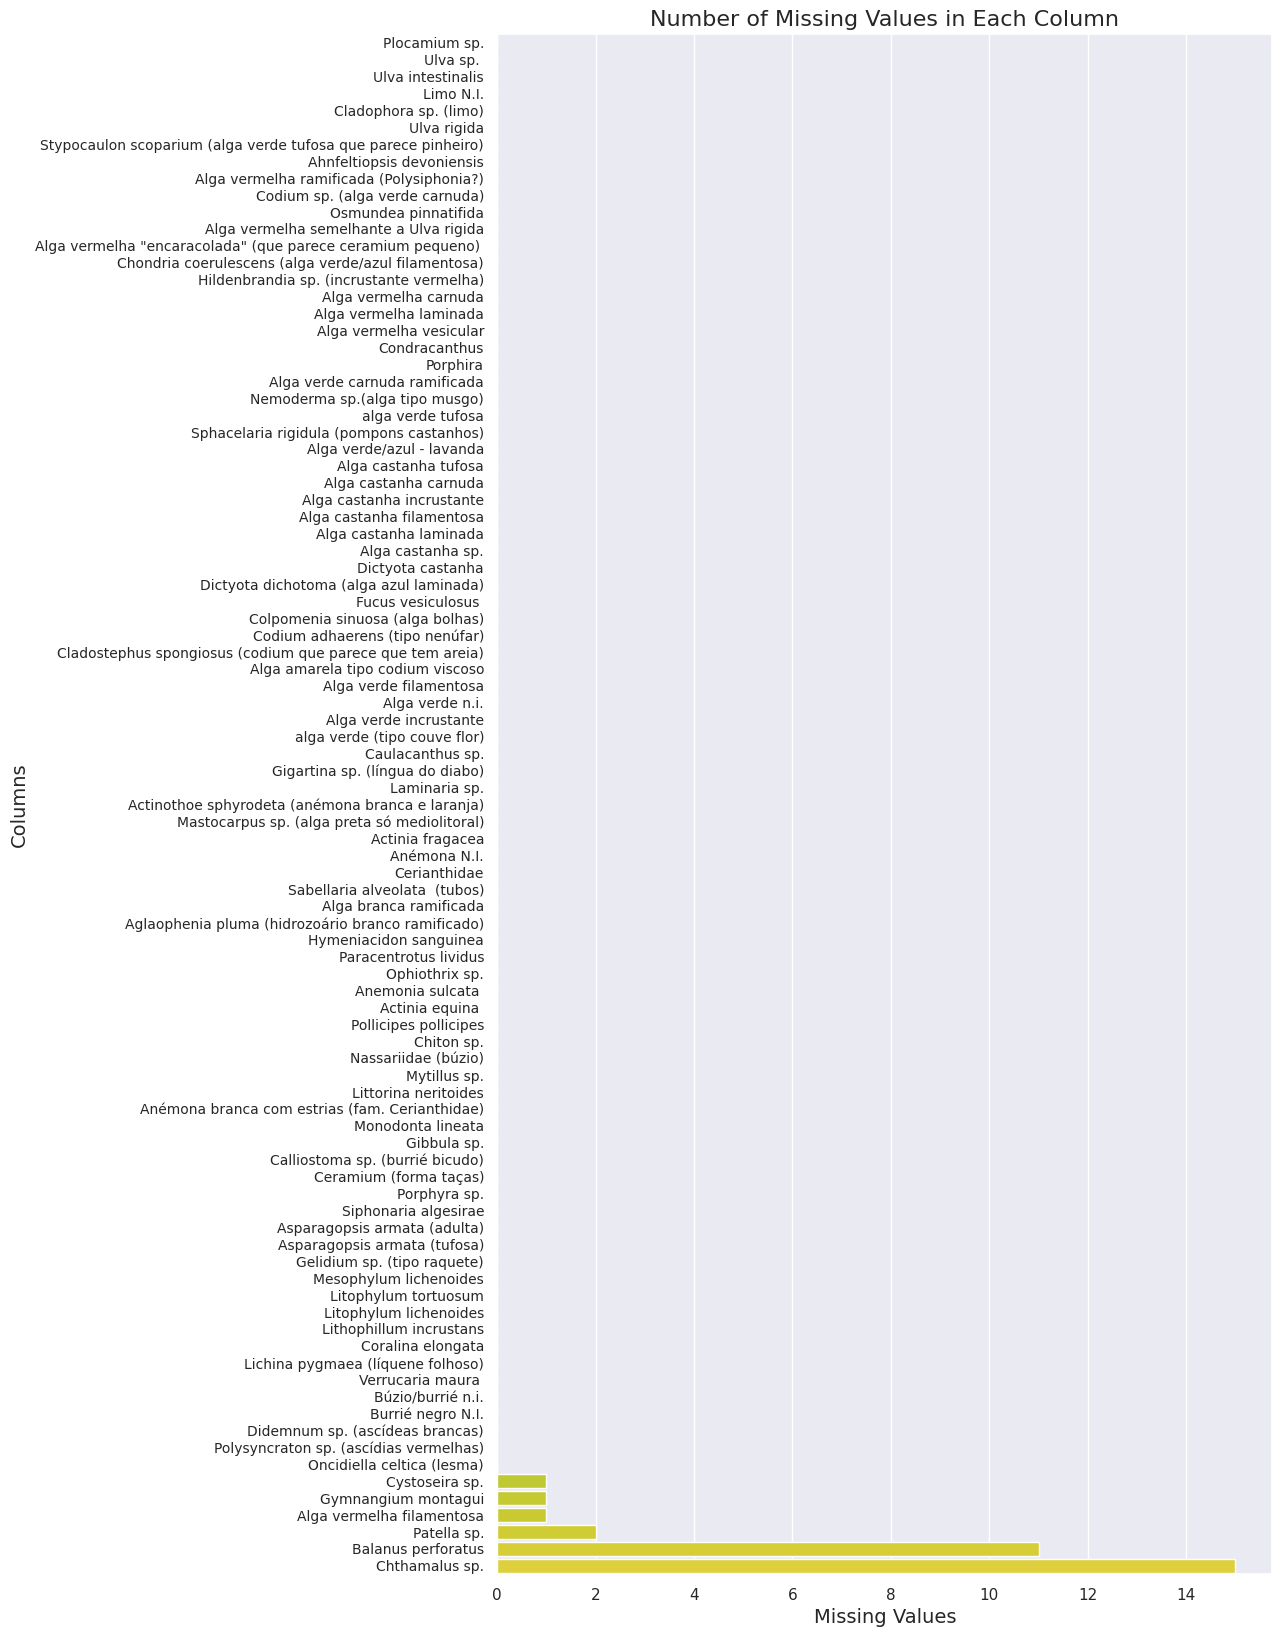

In [272]:
# Calculate the number of missing values in each column
missing_values = sessil_species_info_df.isnull().sum()

# Convert Series to DataFrame for seaborn
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

# Sort DataFrame by number of missing values
missing_values_df = missing_values_df.sort_values(by='Missing Values')

# Create seaborn barplot
plt.figure(figsize=(10, 20))  # adjust size as needed
sns.barplot(x='Missing Values', y='Column', data=missing_values_df, palette='viridis')

plt.title('Number of Missing Values in Each Column', fontsize=16)
plt.xlabel('Missing Values', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.yticks(fontsize=10)  # adjust fontsize as needed

plt.show()

There aren't that many missing values. A good way to replace them is with the previous value (when the data has been sorted by date), to not lose the seasonal effect. So, next we'll need to get the data back together.

In [274]:
df = sessil_meta_info_df.join(sessil_species_info_df)

Here's an idea of what we're dealing with... :)

In [275]:
df

,Date,Hour,Tide,Weather Condition,Water temperature (ºC),Zone,Supratidal/Middle Intertidal,Substrate,TOTAL2,Chthamalus sp.,...,Alga castanha sp.,Alga castanha laminada,Alga castanha filamentosa,Alga castanha incrustante,Alga castanha carnuda,Alga castanha tufosa,Alga verde/azul - lavanda,Sphacelaria rigidula (pompons castanhos),Cystoseira sp.,Laminaria sp.
0,2011-11-28,12:20:00,0.6,Good,16.0,D,Supra,Rock,93.30,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-11-28,12:35:00,0.6,Good,16.0,D,Supra,Rock,0.10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-11-28,10:10:00,0.6,Good,16.0,D,Medium,Puddle,100.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-11-28,10:25:00,0.6,Good,16.0,D,Medium,Rock,99.50,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-11-28,10:40:00,0.6,Good,16.0,D,Medium,Rock,66.45,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,2020-11-16,08:00:00,0.4,Good,18.0,F,Medium,Sand,52.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
2006,2020-11-16,08:00:00,0.4,Good,18.0,F,Medium,Sand,39.55,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,2020-11-16,08:00:00,0.4,Good,18.0,F,Medium,Rock,16.20,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,2020-11-16,08:00:00,0.4,Good,18.0,F,Supra,Rock,3.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's get a DateTime column to ease the following operations.

In [278]:
df['Date'] = df['Date'].astype(str)
df['Hour'] = df['Hour'].astype(str)

# Replace '.' with ':' in 'Hour' column
df['Hour'] = df['Hour'].str.replace('.', ':')

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Hour'])

/tmp/ipykernel_9387/2057767007.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Hour'] = df['Hour'].str.replace('.', ':')


Let's check what are the missing values regarding meta info, perhaps we can also fill in those with the previous value...

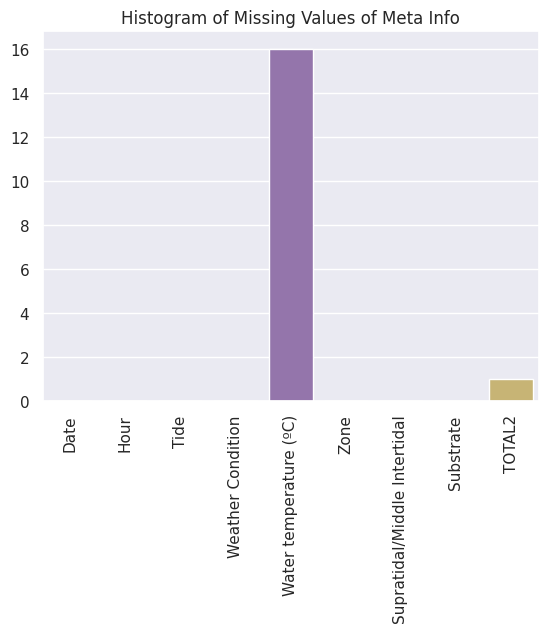

In [215]:
missing_values_meta = sessil_meta_info_df[:-1].isnull().sum()
sns.barplot(x=missing_values_meta.index, y=missing_values_meta)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Histogram of Missing Values of Meta Info')
plt.show()

That seems to be the case with water temperature! Assuming we're around the same time of the year, when ordered by date, we'll get a reasonably close water temperatura. For TOTAL2, we'll have to take a better look.

**So, for every column except TOTAL2, we'll replace missing values with the previous chronological values (of the same Zone).**

In [281]:
# Sort by 'DateTime' and 'Zone' columns
df.sort_values(by=['DateTime', 'Zone'], inplace=True)

# Get all columns except one, 'TOTAL2'
columns_to_fill = [col for col in df.columns if col != 'TOTAL2']

# Fill missing values with previous ones
df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')

Final touch up...

In [289]:
# Get rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Print column name(s) with missing value(s) for each row
for idx, row in rows_with_missing_values.iterrows():
    print(f"Row {idx} has missing value(s) in the following column(s): {row[row.isnull()].index.tolist()}\n")

# Print rows with missing values in a table format
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(rows_with_missing_values)

Row 2 has missing value(s) in the following column(s): ['Balanus perforatus']

Row 1228 has missing value(s) in the following column(s): ['TOTAL2']



,Date,Hour,Tide,Weather Condition,Water temperature (ºC),Zone,Supratidal/Middle Intertidal,Substrate,TOTAL2,Chthamalus sp.,Balanus perforatus,Patella sp.,Siphonaria algesirae,Gibbula sp.,Monodonta lineata,Littorina neritoides,Mytillus sp.,Nassariidae (búzio),Chiton sp.,Pollicipes pollicipes,Actinia equina,Anemonia sulcata,Ophiothrix sp.,Paracentrotus lividus,Hymeniacidon sanguinea,Aglaophenia pluma (hidrozoário branco ramificado),Alga branca ramificada,Sabellaria alveolata (tubos),Cerianthidae,Anémona N.I.,Actinia fragacea,Gymnangium montagui,Anémona branca com estrias (fam. Cerianthidae),Actinothoe sphyrodeta (anémona branca e laranja),Oncidiella celtica (lesma),Calliostoma sp. (burrié bicudo),Polysyncraton sp. (ascídias vermelhas),Didemnum sp. (ascídeas brancas),Burrié negro N.I.,Búzio/burrié n.i.,Verrucaria maura,Lichina pygmaea (líquene folhoso),Coralina elongata,Lithophillum incrustans,Litophylum lichenoides,Litophylum tortuosum,Mesophylum lichenoides,Gelidium sp. (tipo raquete),Asparagopsis armata (tufosa),Asparagopsis armata (adulta),Porphyra sp.,Ceramium (forma taças),Mastocarpus sp. (alga preta só mediolitoral),Gigartina sp. (língua do diabo),Plocamium sp.,Caulacanthus sp.,Condracanthus,Alga vermelha filamentosa,Alga vermelha vesicular,Alga vermelha laminada,Alga vermelha carnuda,Hildenbrandia sp. (incrustante vermelha),Chondria coerulescens (alga verde/azul filamentosa),"Alga vermelha ""encaracolada"" (que parece ceramium pequeno)",Alga vermelha semelhante a Ulva rigida,Porphira,Osmundea pinnatifida,Alga vermelha ramificada (Polysiphonia?),Ahnfeltiopsis devoniensis,Stypocaulon scoparium (alga verde tufosa que parece pinheiro),Ulva rigida,Cladophora sp. (limo),Limo N.I.,Ulva intestinalis,Ulva sp.,Codium sp. (alga verde carnuda),Alga verde carnuda ramificada,Nemoderma sp.(alga tipo musgo),alga verde tufosa,alga verde (tipo couve flor),Alga verde incrustante,Alga verde n.i.,Alga verde filamentosa,Alga amarela tipo codium viscoso,Cladostephus spongiosus (codium que parece que tem areia),Codium adhaerens (tipo nenúfar),Colpomenia sinuosa (alga bolhas),Fucus vesiculosus,Dictyota dichotoma (alga azul laminada),Dictyota castanha,Alga castanha sp.,Alga castanha laminada,Alga castanha filamentosa,Alga castanha incrustante,Alga castanha carnuda,Alga castanha tufosa,Alga verde/azul - lavanda,Sphacelaria rigidula (pompons castanhos),Cystoseira sp.,Laminaria sp.,DateTime
2,2011-11-28,10:10:00,0.6,Good,16.0,D,Medium,Puddle,100.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-11-28 10:10:00
1228,2015-12-15,09:00:00,0.8,Good,16.0,B,Medium,Sand,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,0.0,0.2,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-15 09:00:00


In [293]:
df['Balanus perforatus'].loc[2] = df['Balanus perforatus'].loc[1]

/tmp/ipykernel_9387/1678626034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Balanus perforatus'].loc[2] = df['Balanus perforatus'].loc[1]


In [294]:
df.columns.tolist()

['Date',
 'Hour',
 'Tide',
 'Weather Condition',
 'Water temperature (ºC)',
 'Zone',
 'Supratidal/Middle Intertidal',
 'Substrate',
 'TOTAL2',
 'Chthamalus sp.',
 'Balanus perforatus',
 'Patella sp.',
 'Siphonaria algesirae',
 'Gibbula sp.',
 'Monodonta lineata',
 'Littorina neritoides',
 'Mytillus sp.',
 'Nassariidae (búzio)',
 'Chiton sp.',
 'Pollicipes pollicipes',
 'Actinia equina ',
 'Anemonia sulcata ',
 'Ophiothrix sp.',
 'Paracentrotus lividus',
 'Hymeniacidon sanguinea',
 'Aglaophenia pluma (hidrozoário branco ramificado)',
 'Alga branca ramificada',
 'Sabellaria alveolata  (tubos)',
 'Cerianthidae',
 'Anémona N.I.',
 'Actinia fragacea',
 'Gymnangium montagui',
 'Anémona branca com estrias (fam. Cerianthidae)',
 'Actinothoe sphyrodeta (anémona branca e laranja)',
 'Oncidiella celtica (lesma)',
 'Calliostoma sp. (burrié bicudo)',
 'Polysyncraton sp. (ascídias vermelhas)',
 'Didemnum sp. (ascídeas brancas)',
 'Burrié negro N.I.',
 'Búzio/burrié n.i.',
 'Verrucaria maura ',
 'Lic

In [295]:
# list of columns not to sum
columns_to_exclude = ['Date', 'Hour', 'Tide', 'Weather Condition',
                      'Water temperature (ºC)', 'Zone', 'Supratidal/Middle Intertidal',
                      'Substrate', 'TOTAL2', 'DateTime']

# get a list of all column names
all_columns = df.columns.tolist()

# get the columns to sum
columns_to_sum = list(set(all_columns) - set(columns_to_exclude))

# specific row
row_idx = 1228

# sum values of specific columns for a specific row
row_sum = df.loc[row_idx, columns_to_sum].sum()

# replace TOTAL2
df['TOTAL2'].loc[row_idx] = row_sum

/tmp/ipykernel_9387/815961972.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTAL2'].loc[row_idx] = row_sum


In [296]:
df.isnull().sum().sum()

0

There we have it, zero missing values. We had to do some unoptimal precise surgery there in the end, but alas, it's done!

#### Feature Engineering

#### Correlations

I want to:
Add a Date column, but as a distance to the middle of summer
Add an hour column, but as a distance to the middle of the day
Add 'Weather Condition', 'Water temperature (ºC)', 'Zone', 'Supratidal/Middle Intertidal', 'Substrate' columns from another df
Add polution column from weather api, air temperature column from weather api

Here, we'll also be doing some **feature engineering**. We'll be adding the number of days till the middle of the summer (from Ferreira et al., the Summer was a time of the year that showed a spike in sessil species activity), hours till mid day (reference point, usually a very hot hour), air pollution, air temperature, ...

## 🖼️ Visualisations
Copy here the most important visualizations (graphs, charts, maps, images, etc). You can refer to them in the Executive Summary.

Technical note: If not all the visualisations are visible, you can still include them as an image or link - in this case please upload them to your own repository.

<img src="missing_vals_species.png" alt="missing vals, one specie outlier" style="width:80%">

<img src="missing_vals_species_2.png" alt="missing vals, after removing one outlier" style="width:80%">

## 👓 References
List all of the external links (even if they are already linked above), such as external datasets, papers, blog posts, code repositories and any other materials.

## ⏭️ Appendix
Add here any code, images or text that you still find relevant, but that was too long to include in the main report. This section is optional.
